### Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras import models, layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import random
import os
from keras.models import Model
import cv2 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

### Read Data

In [2]:
image_dog = os.listdir("../input/natural-images/natural_images/dog/")
image_cat = os.listdir("../input/natural-images/natural_images/cat/")

In [3]:
images=[]
for i in image_dog:
    images.append(1)
for i in image_cat:
    images.append(0)
filenames= image_dog+image_cat
df = pd.DataFrame({
    'filename': filenames,
    'category': images
})


In [4]:
df

,filename,category
0,dog_0555.jpg,1
1,dog_0041.jpg,1
2,dog_0667.jpg,1
3,dog_0630.jpg,1
4,dog_0653.jpg,1
...,...,...
1582,cat_0111.jpg,0
1583,cat_0380.jpg,0
1584,cat_0507.jpg,0
1585,cat_0540.jpg,0


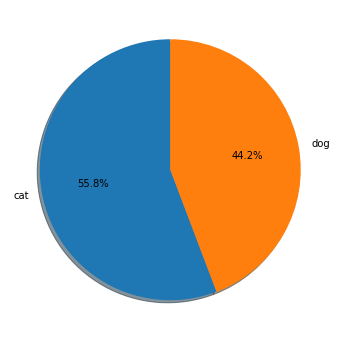

In [5]:
plt.figure(figsize=(10,6))
labels=["cat",'dog']
plt.pie(df['category'].value_counts(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

### Gray image

In [6]:
gray_image_dog=[]
for i in image_dog:
    image = cv2.imread("../input/natural-images/natural_images/dog/"+i)
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray_image_dog.append(gray_img)

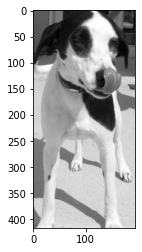

In [7]:
plt.imshow(gray_image_dog[0],cmap='gray')

In [8]:
gray_image_cat=[]
for i in image_cat:
    image = cv2.imread("../input/natural-images/natural_images/cat/"+i)
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray_image_cat.append(gray_img)

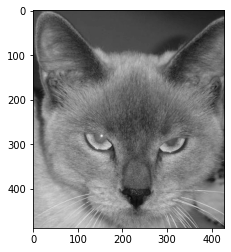

In [9]:
plt.imshow(gray_image_cat[0],cmap='gray')

In [10]:
gray_images=[]
gray_images.append(gray_image_dog)
gray_images.append(gray_image_cat)

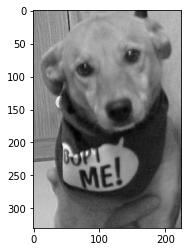

In [11]:
plt.imshow(gray_images[0][104],cmap='gray')

In [12]:
edge_image=[]
for i in range(2):
    for j in range(len(gray_images[i])):
        edges = cv2.Canny(gray_images[i][j], 100, 150)
        edge_image.append(edges)

### Edge image

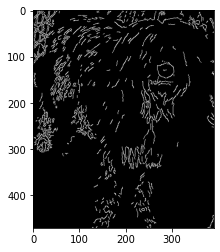

In [13]:
plt.imshow(edge_image[111],cmap='gray')

In [14]:
x_data =[]
y_data = []
import cv2
for label in labels:
    folder_data = os.listdir("../input/natural-images/natural_images/"+label)
    for image_path in folder_data:
        image = cv2.imread("../input/natural-images/natural_images/"+label+'/'+image_path)
        image_resized = cv2.resize(image, (80,80)) # Change the number of pixels for all images
        x_data.append(np.array(image_resized))
        y_data.append(label)
        pass
    pass

x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)
x_data = x_data.astype('float32')/255

the shape of X is:  (1587, 80, 80, 3) and that of Y is:  (1587,)


#### Show sample for images

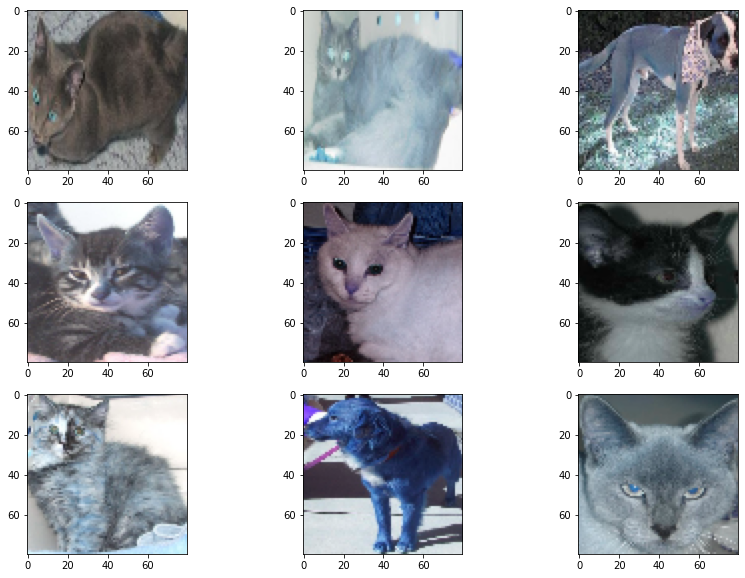

In [15]:
fig, ax = plt.subplots(3,3, figsize=(14,10))
ax[0][0].imshow(x_data[random.choice(range(len(x_data)))])
ax[0][1].imshow(x_data[random.choice(range(len(x_data)))])
ax[0][2].imshow(x_data[random.choice(range(len(x_data)))])
ax[1][0].imshow(x_data[random.choice(range(len(x_data)))])
ax[1][1].imshow(x_data[random.choice(range(len(x_data)))])
ax[1][2].imshow(x_data[random.choice(range(len(x_data)))])
ax[2][0].imshow(x_data[random.choice(range(len(x_data)))])
ax[2][1].imshow(x_data[random.choice(range(len(x_data)))])
ax[2][2].imshow(x_data[random.choice(range(len(x_data)))])
plt.imshow(x_data[0])

In [16]:
y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

In [17]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

### Modeling

In [18]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:],kernel_regularizer= regularizers.l2(0.03)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',kernel_regularizer= regularizers.l2(0.03)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(Dense(units=2,activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
model.summary()

2022-10-28 02:50:08.333560: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 76, 76, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [19]:
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.2)

2022-10-28 02:50:08.769069: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
27/27 [==============================] - 5s 140ms/step - loss: 1.7614 - accuracy: 0.5388 - val_loss: 1.3796 - val_accuracy: 0.4883
Epoch 2/50
27/27 [==============================] - 3s 129ms/step - loss: 1.1509 - accuracy: 0.6294 - val_loss: 0.9767 - val_accuracy: 0.6385
Epoch 3/50
27/27 [==============================] - 4s 131ms/step - loss: 0.8937 - accuracy: 0.6541 - val_loss: 0.7807 - val_accuracy: 0.7371
Epoch 4/50
27/27 [==============================] - 3s 125ms/step - loss: 0.7264 - accuracy: 0.7447 - val_loss: 0.6676 - val_accuracy: 0.7042
Epoch 5/50
27/27 [==============================] - 3s 123ms/step - loss: 0.6459 - accuracy: 0.7600 - val_loss: 0.6918 - val_accuracy: 0.7277
Epoch 6/50
27/27 [==============================] - 4s 150ms/step - loss: 0.5743 - accuracy: 0.8082 - val_loss: 0.6836 - val_accuracy: 0.7230
Epoch 7/50
27/27 [==============================] - 3s 122ms/step - loss: 0.4850 - accuracy: 0.8553 - val_loss: 0.5716 - val_accuracy: 0.7371
Epoch 

### Evaluating

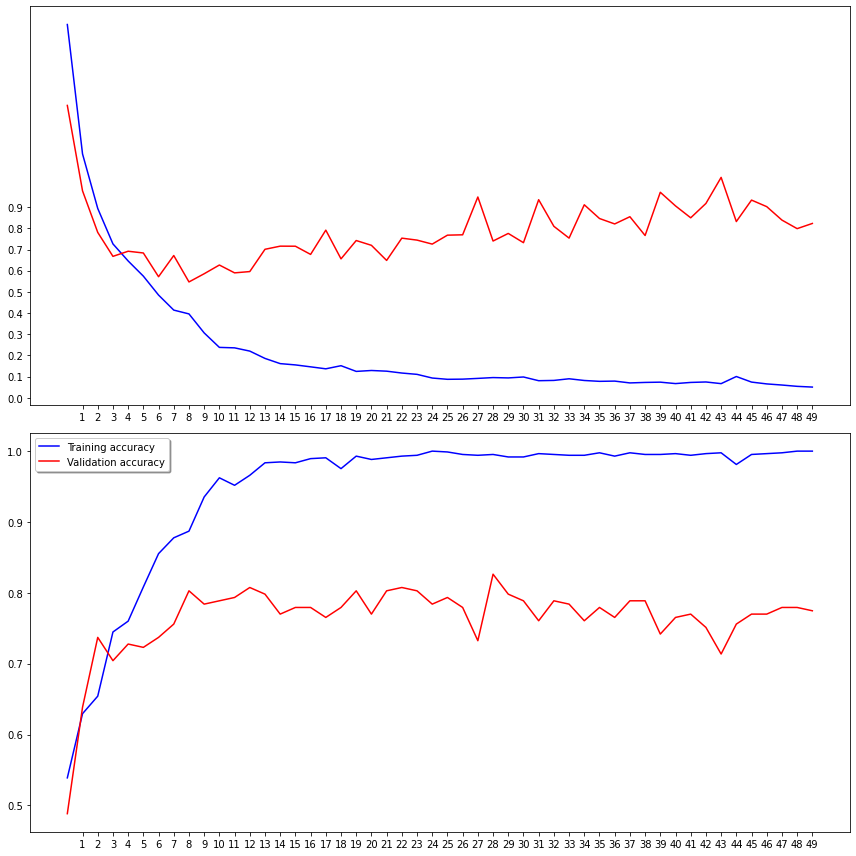

34/34 [==============================] - 1s 30ms/step - loss: 0.2021 - accuracy: 0.9548

 Test accuracy: 0.955


In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 50, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 50, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

print('\n', 'Test accuracy:', round(model.evaluate(X_train,Y_train)[1],ndigits=3))

In [21]:
score=model.evaluate(X_test,Y_test)
print('\n', 'Test accuracy:', round(score[1],ndigits=3))

17/17 [==============================] - 1s 30ms/step - loss: 1.2934 - accuracy: 0.7443

 Test accuracy: 0.744
